In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [2]:
df = pd.read_csv('concrete_data.csv')
df.sample(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
694,236.0,157.0,0.0,192.0,0.0,972.6,749.1,28,32.88
886,148.0,0.0,137.0,158.0,16.0,1002.0,830.0,28,17.95
182,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
982,312.7,0.0,0.0,178.1,8.0,999.7,822.2,28,25.10
631,325.0,0.0,0.0,184.0,0.0,1063.0,783.0,7,17.54


In [3]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=['Strength'])
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

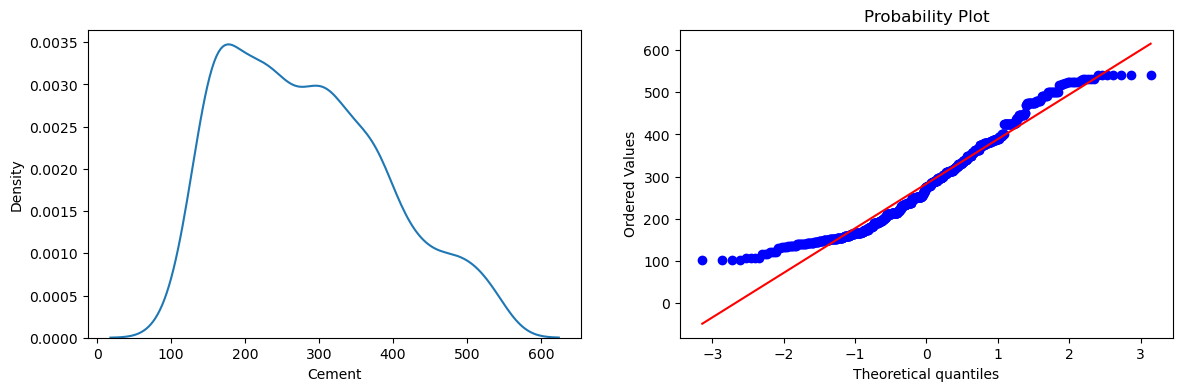

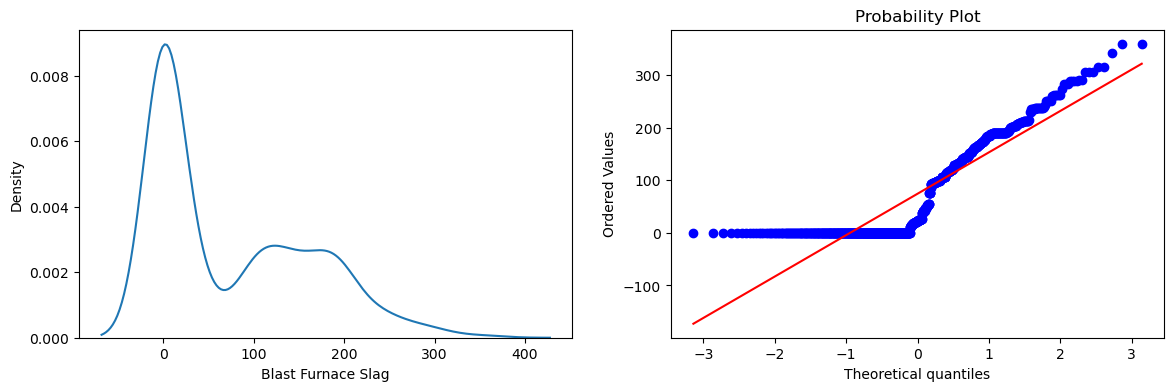

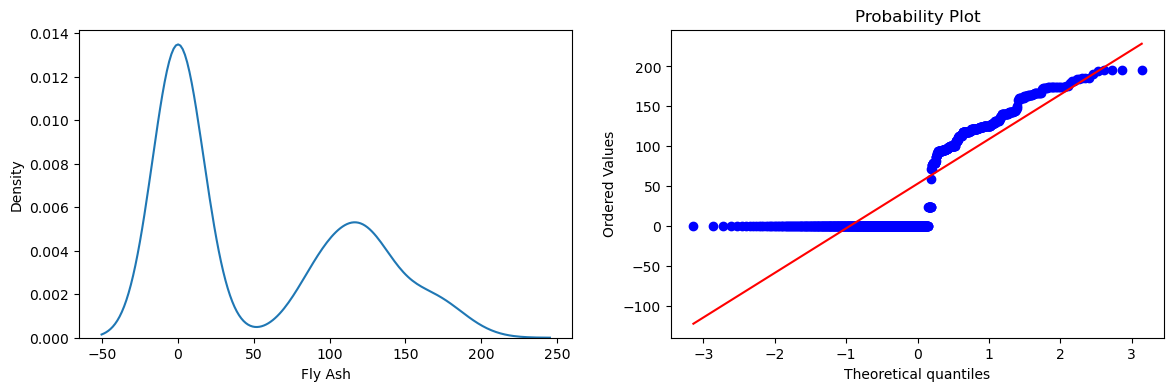

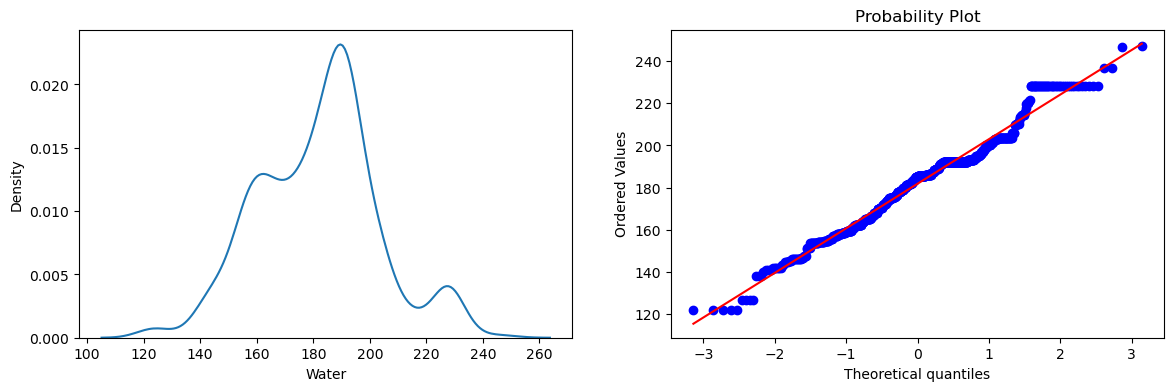

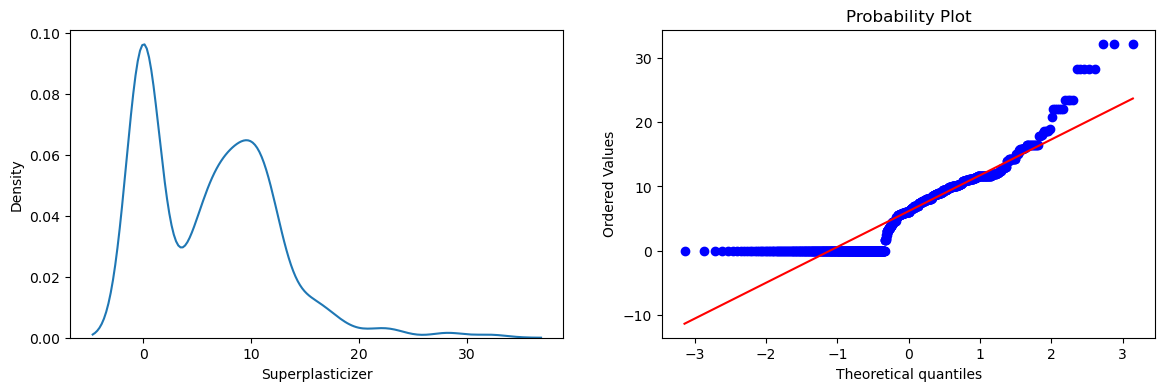

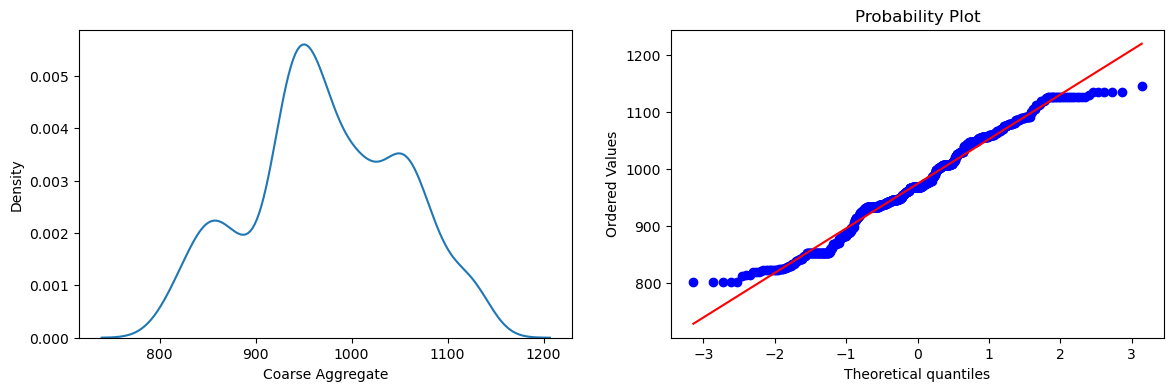

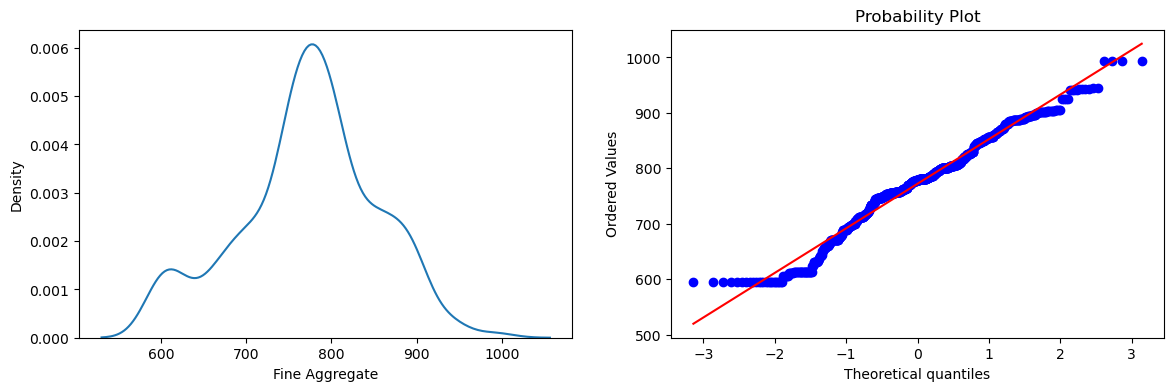

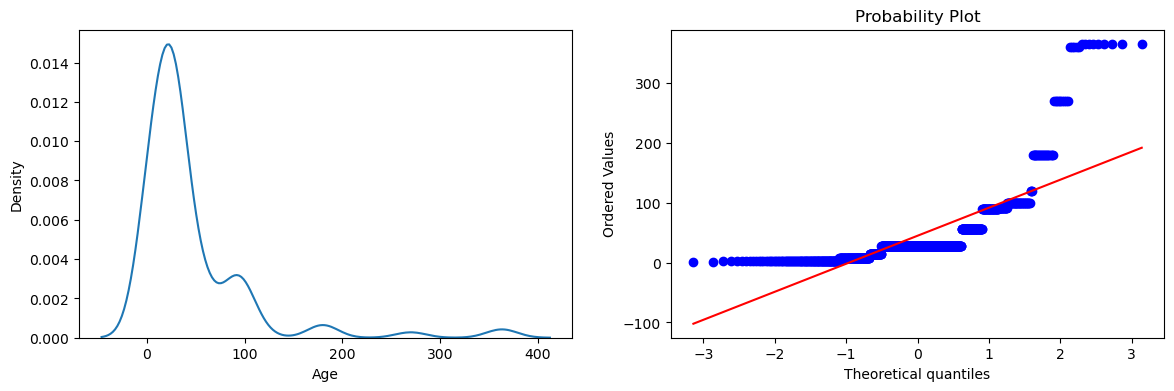

In [4]:
for col in x_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(x_train[col])
    
    plt.subplot(122)
    stats.probplot(x_train[col],plot=plt)

# Predicting without using PowerTransformer (Yeo-Johnson) and without Scaling

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [7]:
pred = lr.predict(x_test)

In [8]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.6275531792314851

In [9]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(lr,x,y,scoring='r2'))

0.4609940491662865

# Predicting without using PowerTransformer but Scaling the data

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [12]:
trf = ColumnTransformer([
    ('Scale',StandardScaler(),slice(0,8))
],remainder='passthrough')

In [13]:
pipe=Pipeline([
    ('Scaling',trf),
    ('Model',LinearRegression())
])

In [14]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('Scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Scale', StandardScaler(),
                                                  slice(0, 8, None))])),
                ('Model', LinearRegression())])

In [15]:
pred_new = pipe.predict(x_test)

In [16]:
np.mean(cross_val_score(pipe,x,y,scoring='r2'))

0.4609940491662865

# Predicting using PowerTransformer and Scaling to get optimum results

In [17]:
from sklearn.preprocessing import PowerTransformer

In [18]:
pt = PowerTransformer()

In [19]:
pipe1 = Pipeline([
    ('Scaling', trf),
    ('transformation', pt),
    ('model', LinearRegression())
])

In [20]:
pipe1.fit(x_train,y_train)

Pipeline(steps=[('Scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Scale', StandardScaler(),
                                                  slice(0, 8, None))])),
                ('transformation', PowerTransformer()),
                ('model', LinearRegression())])

In [21]:
pred1 = pipe1.predict(x_test)

In [22]:
np.mean(cross_val_score(pipe1,x,y,scoring='r2'))

0.7288496631882149